In [2]:
import numpy as np
import pandas as pd

import seaborn as sns
import plotly.express as px
import matplotlib.pyplot as plt
%matplotlib inline

import sklearn
import imblearn as imb
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler, LabelEncoder, MinMaxScaler
from sklearn.metrics import plot_confusion_matrix
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.metrics import f1_score, recall_score, precision_score, confusion_matrix
from sklearn.metrics import r2_score, roc_auc_score, roc_curve, classification_report
from sklearn.ensemble import RandomForestClassifier

from collections import Counter
import warnings
warnings.filterwarnings('ignore')

In [3]:
df = pd.read_csv("heart_failure_clinical_records_dataset.csv")

In [4]:
df.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


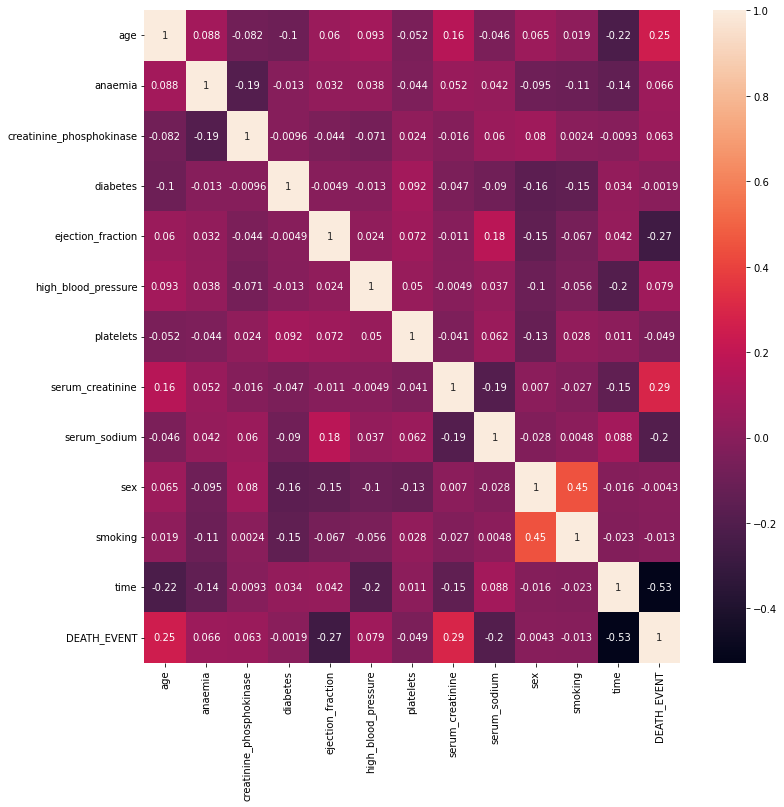

In [5]:
plt.figure(figsize=(12,12))
sns.heatmap(df.corr(), annot=True);

[0.08691343 0.01138605 0.08210129 0.01272722 0.11725275 0.01359315
 0.07789281 0.14102101 0.07477828 0.0129903  0.01246794 0.35687577]


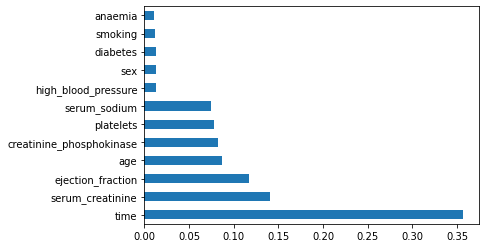

In [6]:
x = df.drop(columns='DEATH_EVENT')
y = df['DEATH_EVENT']

model = RandomForestClassifier()
model.fit(x,y)
print(model.feature_importances_)
feat_importances = pd.Series(model.feature_importances_, index=x.columns)
feat_importances.nlargest(12).plot(kind='barh')
plt.show()

In [7]:
df=df[df['ejection_fraction']<70]

In [8]:
inp_data = df.iloc[:,[0,4,7,11]]
out_data = df[['DEATH_EVENT']]

X_train, X_test, y_train, y_test = train_test_split(inp_data, out_data, test_size=0.2, random_state=0)

sc=StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)

In [9]:
print("X_train Shape : ", X_train.shape)
print("X_test Shape  : ", X_test.shape)
print("y_train Shape : ", y_train.shape)
print("y_test Shape  : ", y_test.shape)

X_train Shape :  (237, 4)
X_test Shape  :  (60, 4)
y_train Shape :  (237, 1)
y_test Shape  :  (60, 1)


In [10]:
param_grid = {
    "n_estimators": [100, 500, 1000],
    "max_features": [0.5,1,'auto'],
    "max_depth": [1,2,3,4,None],
    "min_samples_split": [2,5,8]
}

clf = RandomForestClassifier()
grid = GridSearchCV(clf, param_grid, n_jobs=-1, verbose=2, cv=10)
grid.fit(X_train, y_train)
grid.best_params_

Fitting 10 folds for each of 135 candidates, totalling 1350 fits


{'max_depth': 4,
 'max_features': 1,
 'min_samples_split': 8,
 'n_estimators': 100}

In [11]:
clf = RandomForestClassifier(
    n_estimators=100,
    max_features=1,
    max_depth=3,
    min_samples_split=5,
    random_state=0)

In [12]:
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

In [13]:
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.93      0.93      0.93        43
           1       0.82      0.82      0.82        17

    accuracy                           0.90        60
   macro avg       0.88      0.88      0.88        60
weighted avg       0.90      0.90      0.90        60

[[40  3]
 [ 3 14]]


In [14]:
clf2 = RandomForestClassifier(
    n_estimators=500,
    max_features=1,
    max_depth=4,
    min_samples_split=5,
    bootstrap=True,
    random_state=0)

In [15]:
clf2.fit(X_train, y_train)
y_pred = clf2.predict(X_test)

In [16]:
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.95      0.93      0.94        43
           1       0.83      0.88      0.86        17

    accuracy                           0.92        60
   macro avg       0.89      0.91      0.90        60
weighted avg       0.92      0.92      0.92        60

[[40  3]
 [ 2 15]]


In [17]:
# XGBoost

import xgboost as xgb

In [18]:
param_grid2 = {
    "n_estimators": [100, 500, 1000],
    "max_features": [0.5,1,'auto'],
    "max_depth": [1,2,3,4,None],
    "max_leaves": [2,4,6],
    "min_samples_split": [2,5,8]
}

In [19]:
?xgb.XGBClassifier

Init signature:
xgb.XGBClassifier(
    *,
    objective: Union[str, Callable[[numpy.ndarray, numpy.ndarray], Tuple[numpy.ndarray, numpy.ndarray]], NoneType] = 'binary:logistic',
    use_label_encoder: bool = False,
    **kwargs: Any,
) -> None
Docstring:     
Implementation of the scikit-learn API for XGBoost classification.


Parameters
----------

    n_estimators : int
        Number of boosting rounds.

    max_depth :  Optional[int]
        Maximum tree depth for base learners.
    max_leaves :
        Maximum number of leaves; 0 indicates no limit.
    max_bin :
        If using histogram-based algorithm, maximum number of bins per feature
    grow_policy :
        Tree growing policy. 0: favor splitting at nodes closest to the node, i.e. grow
        depth-wise. 1: favor splitting at nodes with highest loss change.
    learning_rate : Optional[float]
        Boosting learning rate (xgb's "eta")
    verbosity : Optional[int]
        The degree of verbosity. Valid values are 0 (si

In [20]:
xgb_cl = xgb.XGBClassifier(n_estimators=100, max_depth=5, use_label_encoder=False, eval_metric="error")

In [21]:
xgb_cl.fit(X_train, y_train)
y_pred2 = xgb_cl.predict(X_test)

In [22]:
print(classification_report(y_test, y_pred2))
print(confusion_matrix(y_test, y_pred2))

              precision    recall  f1-score   support

           0       0.92      0.81      0.86        43
           1       0.64      0.82      0.72        17

    accuracy                           0.82        60
   macro avg       0.78      0.82      0.79        60
weighted avg       0.84      0.82      0.82        60

[[35  8]
 [ 3 14]]


In [23]:
xgb_cl2 = xgb.XGBClassifier(use_label_encoder=False, eval_metric="error")
grid = GridSearchCV(xgb_cl2, param_grid2, n_jobs=-1, verbose=2, cv=10)
grid.fit(X_train, y_train)

Fitting 10 folds for each of 405 candidates, totalling 4050 fits
[13:19:00] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "max_features", "min_samples_split" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.




GridSearchCV(cv=10,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False,
                                     eval_metric='error', gamma=None,
                                     gpu_id=None, grow_policy=None,
                                     importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None, max_bin=None,
                                     ma...
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     n_estimators=100, 

In [24]:
grid.best_params_

{'max_depth': 1,
 'max_features': 0.5,
 'max_leaves': 2,
 'min_samples_split': 2,
 'n_estimators': 100}

In [25]:
xgb_cl3 = xgb.XGBClassifier(objective="binary:logistic",max_depth=1, max_leaves=2, n_estimators=100, learning_rate=0.5, booster="gbtree", use_label_encoder=False, eval_metric="error")

In [26]:
xgb_cl3.fit(X_train, y_train)
y_pred3 = xgb_cl3.predict(X_test)

In [27]:
print(classification_report(y_test, y_pred3))
print(confusion_matrix(y_test, y_pred3))

              precision    recall  f1-score   support

           0       0.95      0.91      0.93        43
           1       0.79      0.88      0.83        17

    accuracy                           0.90        60
   macro avg       0.87      0.89      0.88        60
weighted avg       0.91      0.90      0.90        60

[[39  4]
 [ 2 15]]


In [77]:
train = xgb.DMatrix(X_train, label=y_train)
test = xgb.DMatrix(X_test, label=y_test)

In [70]:
?xgb.DMatrix

Init signature:
xgb.DMatrix(
    data: Any,
    label: Optional[Any] = None,
    *,
    weight: Optional[Any] = None,
    base_margin: Optional[Any] = None,
    missing: Optional[float] = None,
    silent: bool = False,
    feature_names: Optional[List[str]] = None,
    feature_types: Optional[List[str]] = None,
    nthread: Optional[int] = None,
    group: Optional[Any] = None,
    qid: Optional[Any] = None,
    label_lower_bound: Optional[Any] = None,
    label_upper_bound: Optional[Any] = None,
    feature_weights: Optional[Any] = None,
    enable_categorical: bool = False,
) -> None
Docstring:     
Data Matrix used in XGBoost.

DMatrix is an internal data structure that is used by XGBoost,
which is optimized for both memory efficiency and training speed.
You can construct DMatrix from multiple different sources of data.
Init docstring:
Parameters
----------
data : os.PathLike/string/numpy.array/scipy.sparse/pd.DataFrame/
       dt.Frame/cudf.DataFrame/cupy.array/dlpack
    Data sou

In [29]:
grid.best_params_

{'max_depth': 1,
 'max_features': 0.5,
 'max_leaves': 2,
 'min_samples_split': 2,
 'n_estimators': 100}

In [78]:
epochs=10
params = {"max_depth": 1,
          "eta": 0.3,
          "objective": "multi:softmax",
          "num_class": 2
}

In [79]:
model = xgb.train(params, train, epochs)

In [80]:
predictions = model.predict(test)
predictions2 = model.predict(train)

In [81]:
print(confusion_matrix(y_test, predictions))
print(classification_report(y_test, predictions))

print(confusion_matrix(y_train, predictions2))
print(classification_report(y_train, predictions2))

[[43  0]
 [ 2 15]]
              precision    recall  f1-score   support

           0       0.96      1.00      0.98        43
           1       1.00      0.88      0.94        17

    accuracy                           0.97        60
   macro avg       0.98      0.94      0.96        60
weighted avg       0.97      0.97      0.97        60

[[152   7]
 [ 31  47]]
              precision    recall  f1-score   support

           0       0.83      0.96      0.89       159
           1       0.87      0.60      0.71        78

    accuracy                           0.84       237
   macro avg       0.85      0.78      0.80       237
weighted avg       0.84      0.84      0.83       237



In [34]:
predictions2 = model.predict(train)

In [35]:
print(confusion_matrix(y_train, predictions2))
print(classification_report(y_train, predictions2))

[[152   7]
 [ 31  47]]
              precision    recall  f1-score   support

           0       0.83      0.96      0.89       159
           1       0.87      0.60      0.71        78

    accuracy                           0.84       237
   macro avg       0.85      0.78      0.80       237
weighted avg       0.84      0.84      0.83       237



In [36]:
# zrobić K-Fold cross validation
# zrobić tuning hiperparametrów

In [73]:
model = xgb.XGBClassifier(max_depth=1,
                          n_estimators=500,
                          subsample=1,
                          learning_rate=0.1,
                          min_child_weight=5,
                          random_state=42

)
model.fit(X_train, y_train)

y_prediction = model.predict(X_train)
y_prediction2 = model.predict(X_test)

print("Train", accuracy_score(y_train, y_prediction))
print("Test", accuracy_score(y_test, y_prediction2))

print("Train","\n", confusion_matrix(y_train, y_prediction))
print("Test","\n", confusion_matrix(y_test, y_prediction2))

Train 0.8945147679324894
Test 0.9
Train 
 [[148  11]
 [ 14  64]]
Test 
 [[39  4]
 [ 2 15]]


(60, 1)
(237,)
